In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
from matplotlib.font_manager import FontProperties # 字体属性管理器，知道就好
 # 读取CSV文件的数据，替换数据的路径即可，即单引号内的内容
data = pd.read_csv(r'hour.csv')
#data = pd.read_excel(r'elec370.xlsx')

# .iloc[:,0] 表示读取 data 的某行某列，第一个 ：表示所有行，0 表示读取第一列，这样就对应的第一列的所有行，注意 Python 是从 0 计数的
#time = data.iloc[:,0]
#time=np.linspace(0,(17378)*1.0,17379)
#数据设置
#x1 =time
#x1=pd.DataFrame(x1)
y1=data.iloc[:,16]
 

timeSeries = np.array(y1)
#k = 1 
#timeSeries1 = np.array([1,10,100,1000,10000])
#timeSeries2 = np.array([100,1,1000,10,10000])


In [2]:
timeSeries.shape

(17379,)

In [3]:
def get_auto_corr(timeSeries,k):
    '''
    Descr:输入：时间序列timeSeries，滞后阶数k
            输出：时间序列timeSeries的k阶自相关系数
        l：序列timeSeries的长度
        timeSeries1，timeSeries2:拆分序列1，拆分序列2
        timeSeries_mean:序列timeSeries的均值
        timeSeries_var:序列timeSeries的每一项减去均值的平方的和
        
    '''
   # k=ii*4
    l = len(timeSeries)
    #取出要计算的两个数组
    timeSeries1 = timeSeries[0:l-k]
    timeSeries2 = timeSeries[k:]
    timeSeries_mean = timeSeries.mean()
    timeSeries_var = np.array([i**2 for i in timeSeries-timeSeries_mean]).sum()
    auto_corr = 0
    for i in range(l-k):
        temp = (timeSeries1[i]-timeSeries_mean)*(timeSeries2[i]-timeSeries_mean)/timeSeries_var
        auto_corr = auto_corr + temp  
    return auto_corr
 
#画出各阶自相关系数的图
#mins=60
def plot_auto_corr(timeSeries,ii):
    '''
    Descr:需要计算自相关函数get_auto_corr(timeSeries,k)
            输入时间序列timeSeries和想绘制的阶数k，k不能超过timeSeries的长度
            输出：k阶自相关系数图，用于判断平稳性
    '''
    xing=1
    inter=1*xing
    k=ii*inter
    timeSeriestimeSeries = pd.DataFrame(range(ii))
    for i in range(1,ii+1):
        timeSeriestimeSeries.loc[i-1] =get_auto_corr(timeSeries,i*inter)
    px=range(1,(len(timeSeriestimeSeries)*1+1),1)
    py=timeSeriestimeSeries[0]
    print(py)
    py.to_excel('cor_Bik.xls')
    ppplot(px,py)
    return timeSeriestimeSeries
def ppplot(x1,y1):
    #设置输出的图片大小
    figsize = 7.00,1.33#2.66#5.32
    figure, ax = plt.subplots(figsize=figsize)
 
    #在同一幅图片上画两条折线
    x1=x1
    A,=plt.plot(x1,y1,'-r',label='A',linewidth=1.0,c='#fe5f55')
    #A,=plt.scatter(x1,y1,label='A',c='#fe5f55',s=2)
    #B,=plt.plot(x2,y2,'b-.',label='B',linewidth=2.0)
 
    #设置图例并且设置图例的字体及大小
    font1 = {'family' : 'Times New Roman',
    'weight' : 'normal',
    'size' : 20,
    }
    #legend = plt.legend(handles=[A,B],prop=font1)

    # 设置 X 和 Y 轴的最小最大值范围，对应的修改数字即可
    plt.xlim(0, 350)
    plt.ylim(-0.5,1)
    # 设置坐标轴刻度值显示间隔，对应的修改数字即可
    #x_major_locator=MultipleLocator(5000)
    #y_major_locator=MultipleLocator(0.5)
     
    #设置坐标刻度值的大小以及刻度值的字体
    plt.tick_params(labelsize=10)
    labels = ax.get_xticklabels() + ax.get_yticklabels()
    [label.set_fontname('Times New Roman') for label in labels]
 
    #设置横纵坐标的名称以及对应字体格式
    font2 = {'family' : 'Times New Roman',
    'weight' : 'normal',
    'size' : 12,
    }
    plt.xlabel('Time lag(h)', font2)
    plt.ylabel('R', font2)
    #ax.set_xlabel("2013", fontsize=12)
    from matplotlib.pyplot import MultipleLocator
 
    # 设置坐标轴的朝向，in 表示朝内向，反之亦然
    plt.tick_params(direction='in')  #设置坐标轴刻度的朝向
 
    #将文件保存至文件中并且画出图
    plt.savefig('ppplot3.png')
    plt.show()

0      0.843774
1      0.594070
2      0.404356
3      0.272212
4      0.145557
         ...   
345   -0.068600
346   -0.100139
347   -0.112482
348   -0.088083
349   -0.055837
Name: 0, Length: 350, dtype: float64


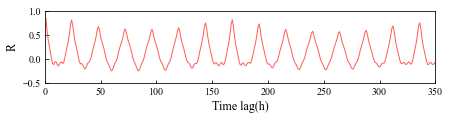

,0
0,0.843774
1,0.594070
2,0.404356
3,0.272212
4,0.145557
...,...
345,-0.068600
346,-0.100139
347,-0.112482
348,-0.088083


In [110]:
k=350
plot_auto_corr(timeSeries,k)

In [ ]:
#设置输出的图片大小
figsize = 7.00,1.33#2.66#5.32
figure, ax = plt.subplots(figsize=figsize)
 
#在同一幅图片上画两条折线
A,=plt.plot(x1,y1,'-r',label='A',linewidth=1.0,c='#fe5f55')
#A,=plt.scatter(x1,y1,label='A',c='#fe5f55',s=2)
#B,=plt.plot(x2,y2,'b-.',label='B',linewidth=2.0)
 
#设置图例并且设置图例的字体及大小
font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size' : 20,
}
#legend = plt.legend(handles=[A,B],prop=font1)

# 设置 X 和 Y 轴的最小最大值范围，对应的修改数字即可
plt.xlim(0, 350)
plt.ylim(0,300)
# 设置坐标轴刻度值显示间隔，对应的修改数字即可
#x_major_locator=MultipleLocator(5000)
#y_major_locator=MultipleLocator(0.5)
 
#设置坐标刻度值的大小以及刻度值的字体
plt.tick_params(labelsize=10)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]
 
#设置横纵坐标的名称以及对应字体格式
font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size' : 12,
}
plt.xlabel('Time (h)', font2)
plt.ylabel('Count', font2)
#ax.set_xlabel("2013", fontsize=12)
from matplotlib.pyplot import MultipleLocator
 
# 设置坐标轴的朝向，in 表示朝内向，反之亦然
plt.tick_params(direction='in')  #设置坐标轴刻度的朝向
 
#将文件保存至文件中并且画出图
plt.savefig('electricity3.png')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

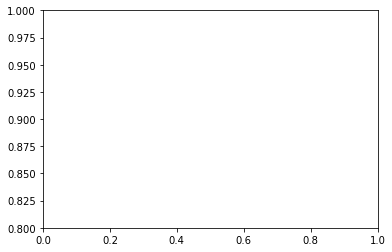

In [57]:
plt.ylim(0.8,1)
plt.show

In [70]:
x1

NameError: name 'x1' is not defined